# D208 PA 2 code - Doug Haunsperger
### Do initial package import and data read, using code from D206

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('medical_clean.csv')

#view first 5 rows
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


## Data Cleaning - C1
### Show variable names, non-null counts using `info()`

In [2]:
df.info()
df.isnull().sum()[df.isnull().sum() > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Series([], dtype: int64)

### Selecting variables to answer research question

For possible explanatory variables, I am casting a wide net, looking at demographic info as well as reported medical conditions.

In [3]:
# Target variable
target='Stroke'
# Quantitative explanatory
quant_cols=['Population', 'Children', 'Age', 'Income', 'VitD_levels']
# Categorical explanatory
cat_cols = ['Marital', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
            'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

### Check for duplicate data
First, check for duplicate rows

In [4]:
df.duplicated().value_counts()

False    10000
dtype: int64

Check to see if there are any duplicate `Customer_id` values, perhaps with different data entered

In [5]:
df.duplicated(subset = ['Customer_id'], keep = False).value_counts()

False    10000
dtype: int64

Using the `medical_clean` dataset, all duplicates and nulls have already been removed. Next I'll check for outliers.

### Check for outliers

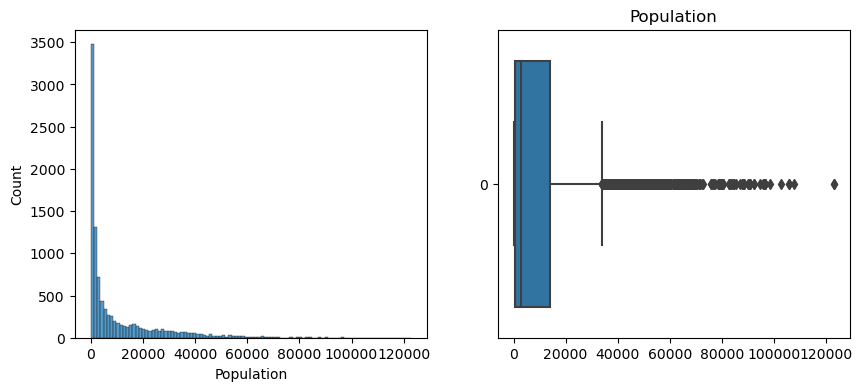

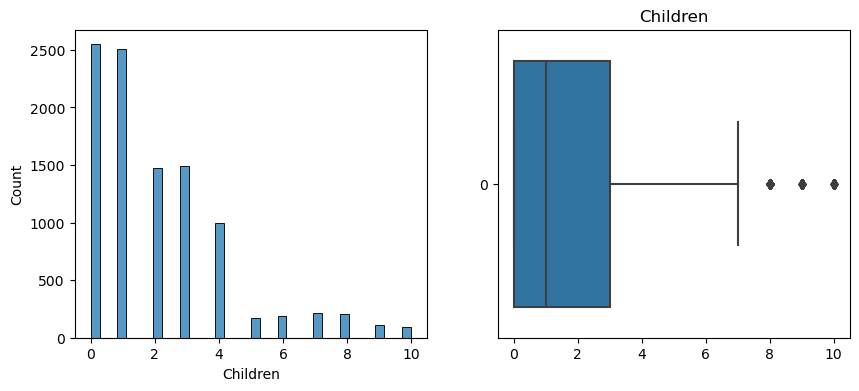

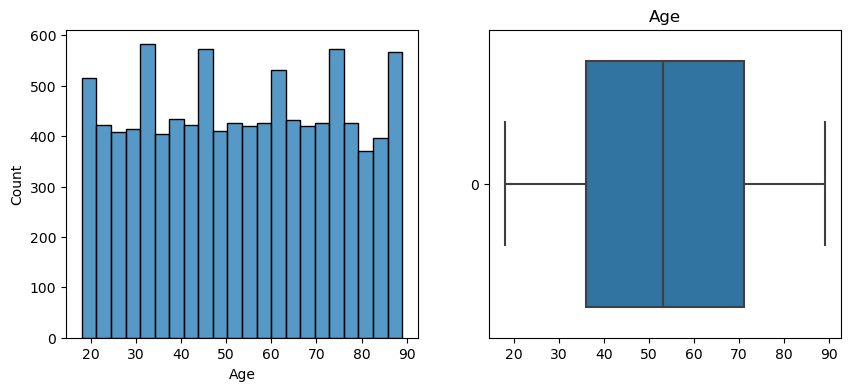

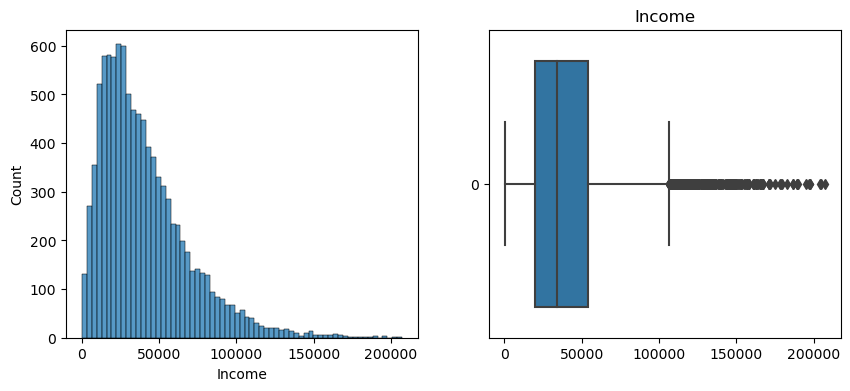

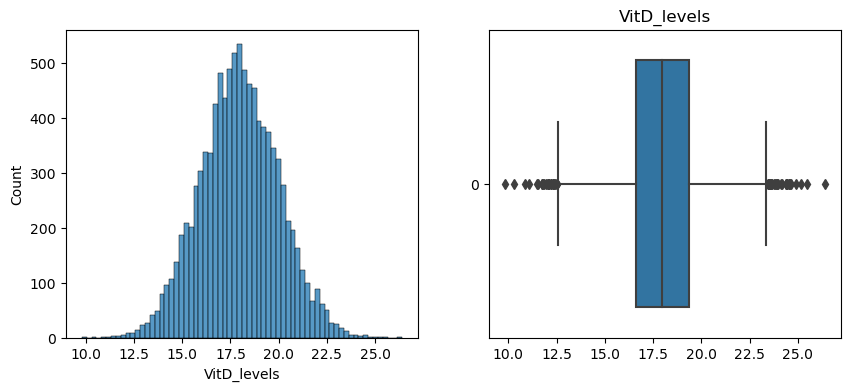

In [6]:
# Choose only the quantitative columns

# Ref: https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell (Kassies, 2013)
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    plt.title(col)
    sns.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

### Treating Outliers
I will use the same treatment methodologies I did with the data in PA 1.

#### Population
Population is reasonable to have a long-tail, right-skew distribution. However, zero values are not reasonable. They would also interfere with doing a log transformation later.

In [7]:
df[(df.Population == 0)].shape

(109, 50)

Removing `Population == 0` outliers from the data set and move them to a separate data frame

In [8]:
pop_outliers = df[(df.Population == 0)]
df.drop(df[(df.Population == 0)].index, inplace=True)
df.shape

(9891, 50)


#### Children

Exclude rows reporting 8 or more children as outliers - move them to a separate data frame.

In [9]:
chil_outliers = df[(df['Children'] >= 8)]
df.drop(df[(df['Children'] >= 8)].index, inplace=True)
df.shape

(9483, 50)

#### Age

Uniform distribution - no outliers

#### Income

Outlying values are within reason. Income levels of $207,000/year are expected in a population.

In [10]:
df['Income'].describe()

count      9483.000000
mean      40469.722345
std       28390.489229
min         300.790000
25%       19651.765000
50%       33872.380000
75%       54374.620000
max      207249.100000
Name: Income, dtype: float64

#### VitD_levels

The `VitD_levels` distribution appears normally distributed - no reason to exclude outliers.

## C2 - Summary Statistics

#### Target Variable

In [11]:
df[target].describe()

count     9483
unique       2
top         No
freq      7602
Name: Stroke, dtype: object

#### Quantitative explanatory variables

In [12]:
df[quant_cols].describe()

,Population,Children,Age,Income,VitD_levels
count,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,10076.497627,1.812717,53.487082,40469.722345,17.965027
std,14870.421052,1.700075,20.632396,28390.489229,2.013126
min,1.000000,0.000000,18.000000,300.790000,9.806483
25%,735.000000,0.000000,36.000000,19651.765000,16.631182
50%,2860.000000,1.000000,53.000000,33872.380000,17.948704
75%,14144.000000,3.000000,71.000000,54374.620000,19.350621
max,122814.000000,7.000000,89.000000,207249.100000,26.394449


#### Categorical explanatory variables
For categorical values, describe() provides the number of unique values, the most frequent value `top`, and the number of times that value appears in the dataset `freq`  (Pandas.DataFrame.describe — Pandas 2.1.2 Documentation, n.d.)

In [13]:
df[cat_cols].describe()

,Marital,Soft_drink,HighBlood,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483
unique,5,2,2,3,2,2,2,2,2,2,2,2,2
top,Widowed,No,No,Medium,Yes,No,No,No,No,No,No,No,No
freq,1941,7042,5610,4291,6734,6090,6915,6279,5571,6447,5733,5564,6735


## C3 - Visualizations
### Univariate visualizations

#### Target Variable

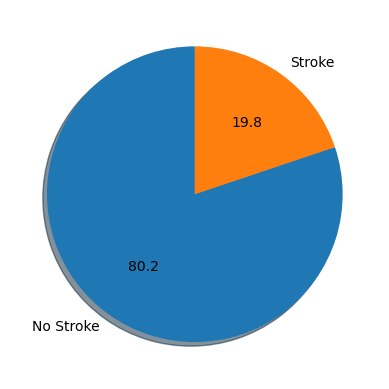

In [14]:
# Code ref: Sudheer, 2023.
plt.pie(df[target].value_counts(),labels=['No Stroke', 'Stroke'],shadow=True, autopct='%.1f', startangle=90)
plt.show()

#### Quantitative explanatory variables

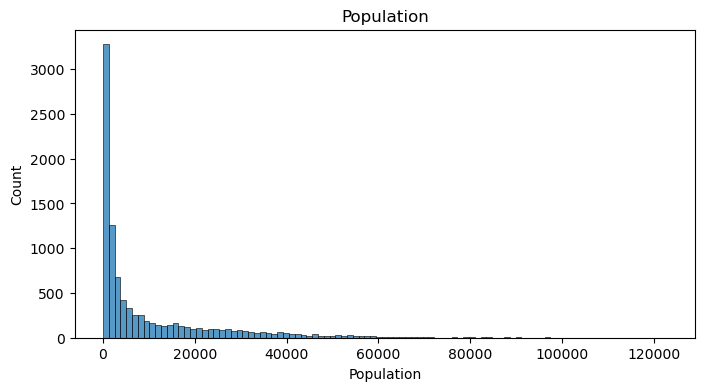

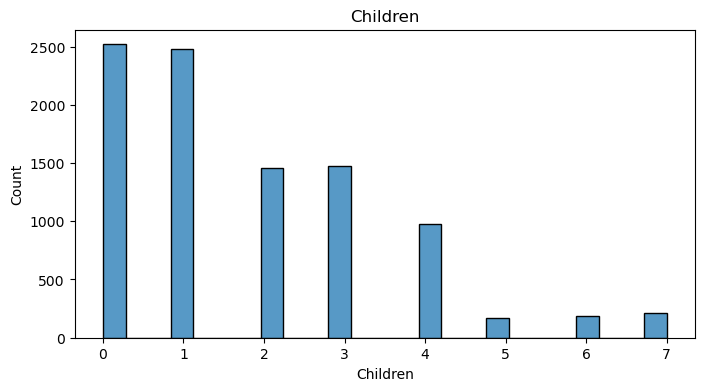

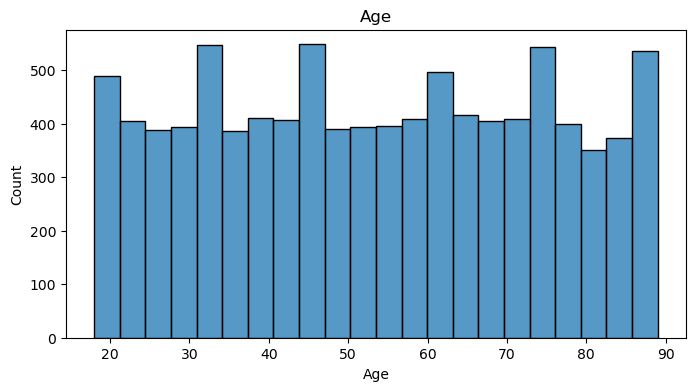

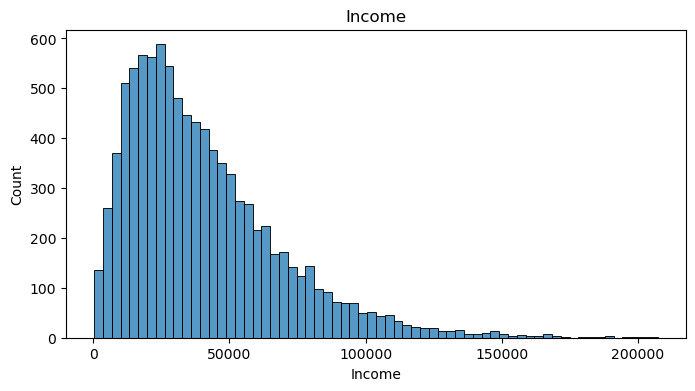

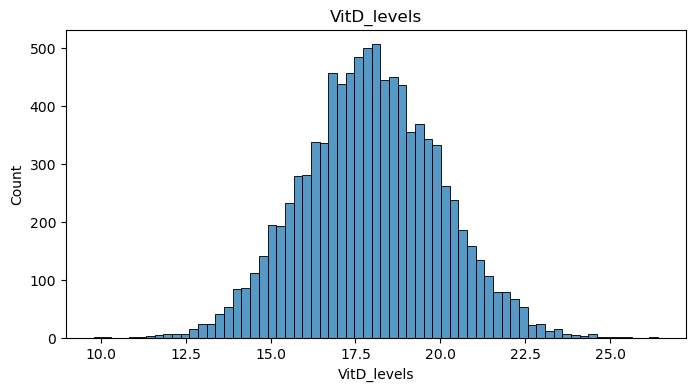

In [15]:
for col in quant_cols:
    fig, axs = plt.subplots(1,1, figsize=(8,4))
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show

The right-skewed distributions `Population` and `Income` might benefit from a log-scale analysis

<Axes: xlabel='Population', ylabel='Count'>

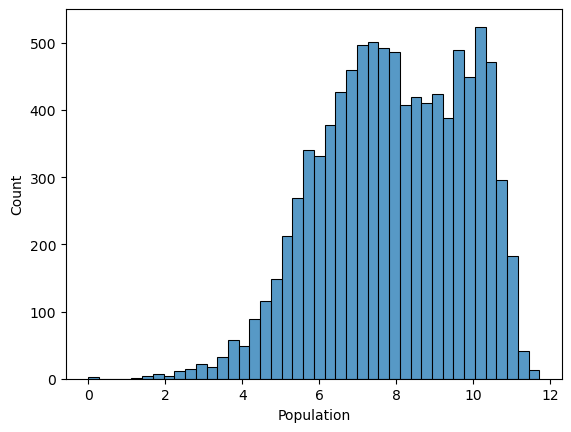

In [16]:
sns.histplot(np.log(df.Population))

<Axes: xlabel='Income', ylabel='Count'>

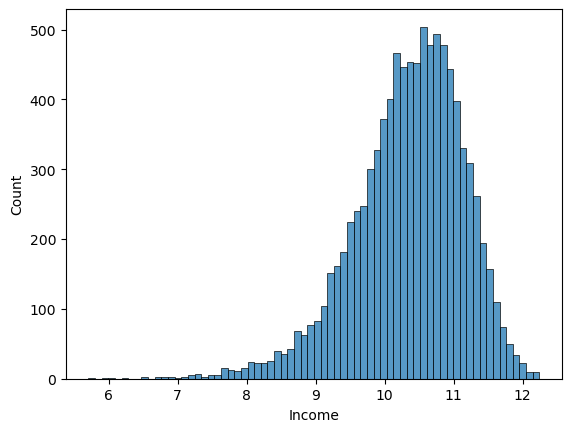

In [17]:
sns.histplot(np.log(df.Income))

#### Categorical explanatory variables

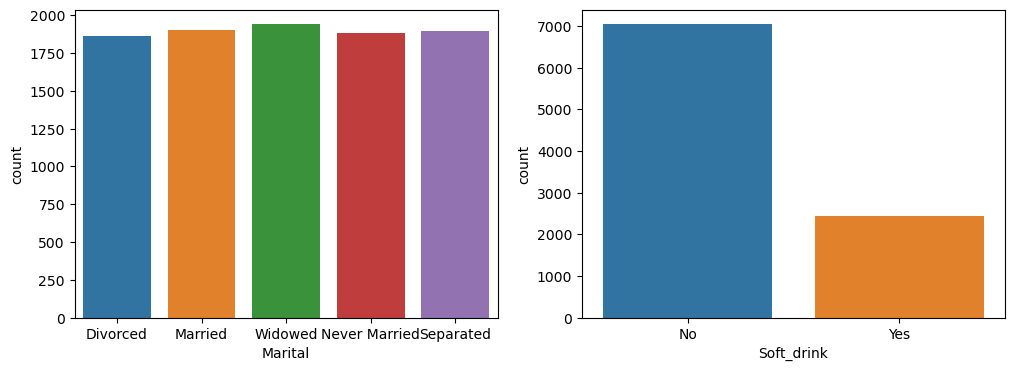

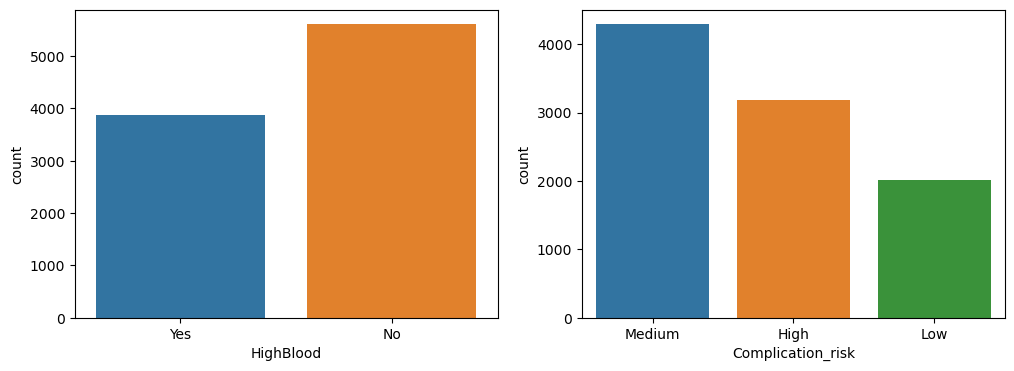

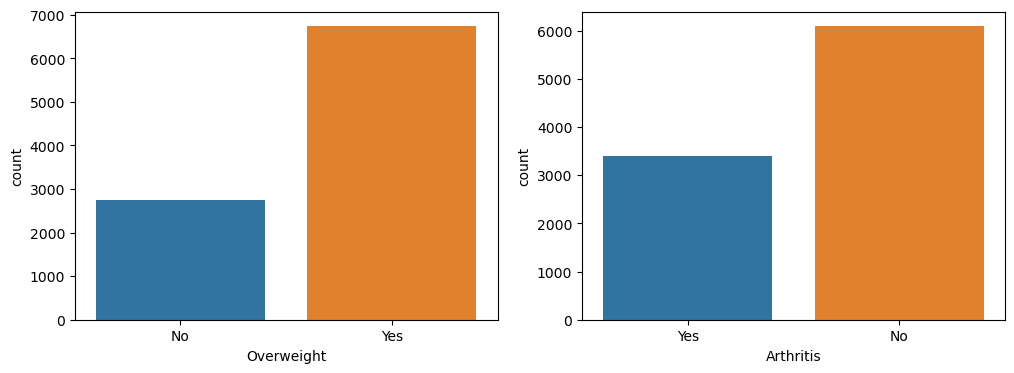

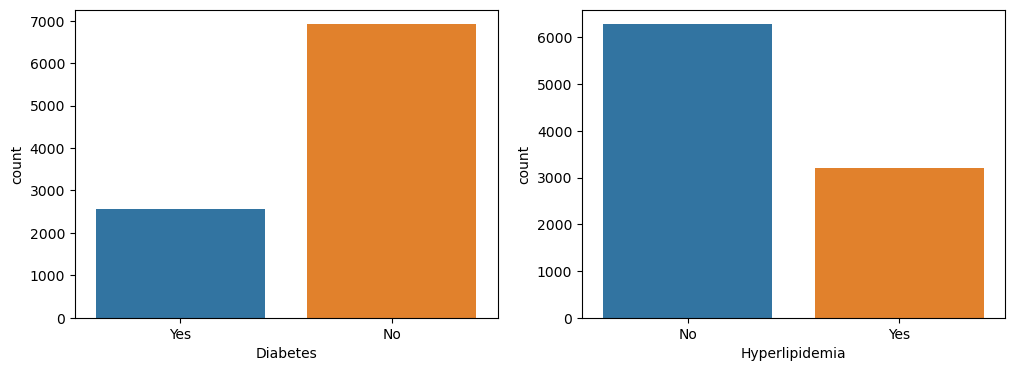

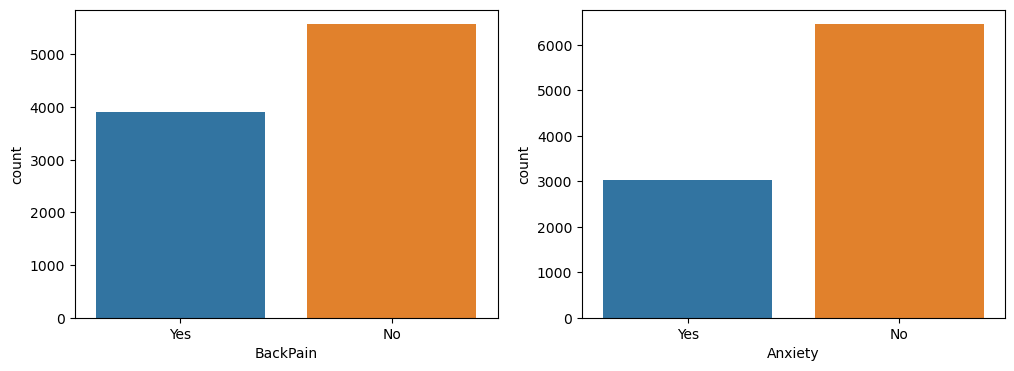

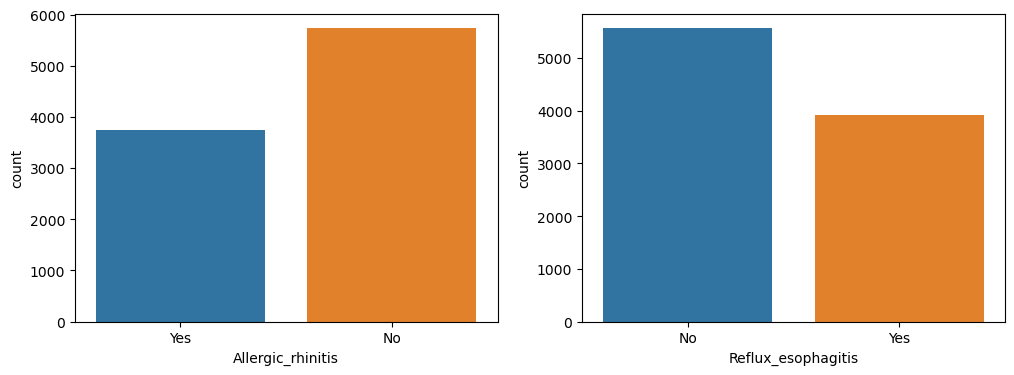

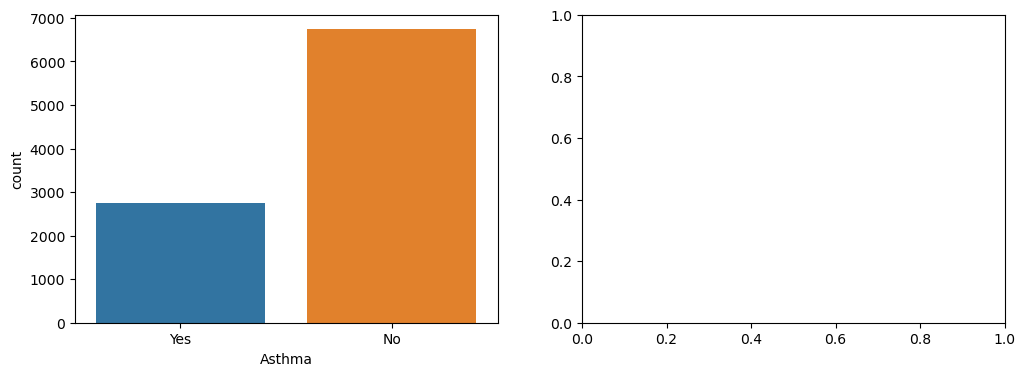

In [18]:
# Use bar charts rather than histograms for categorical variables - Seaborn countplot provides this functionality (Sudheer, 2023).
a=0
for col in cat_cols:
    if (a == 0) :    # Setup axes on every even iteration
        fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.countplot(x=df[col], ax=axs[a])
    a = (a + 1) % 2   # alternate graphs on left/right of display
    #plt.title(col)
    if (a == 1) :   # Show plot on every odd iteration
        plt.show

### Bivariate visualizations

#### Quantitative explanatory variables

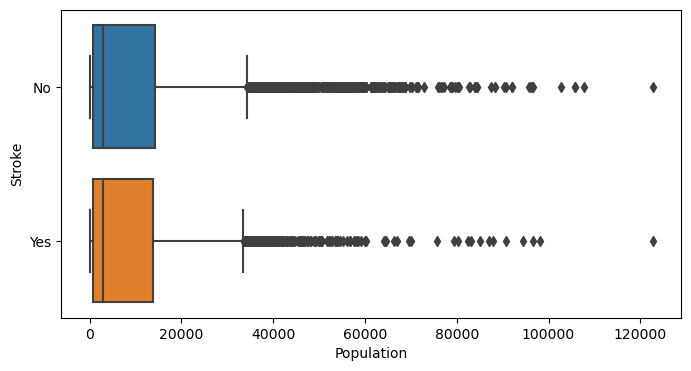

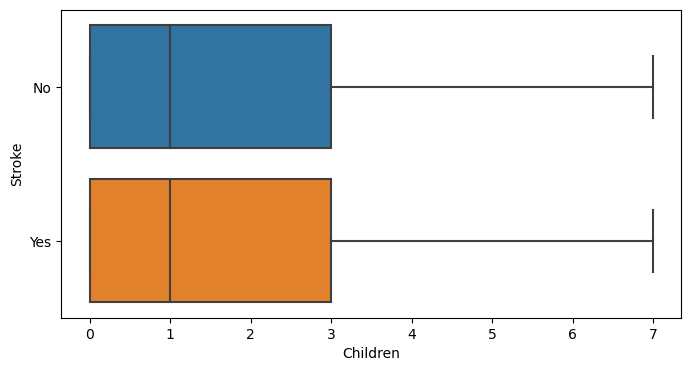

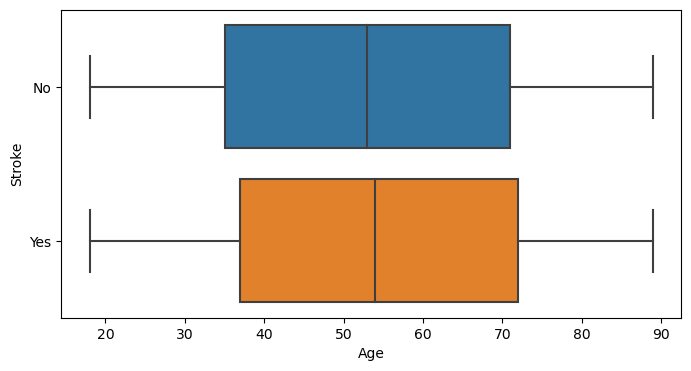

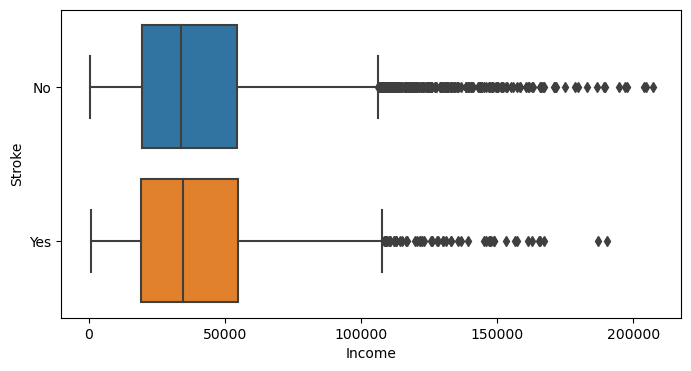

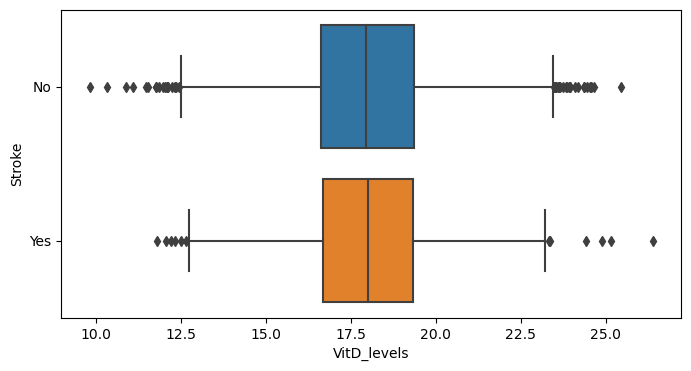

In [19]:
for col in quant_cols:
    fig, axs = plt.subplots(1,1, figsize=(8,4))
    sns.boxplot(x=df[col], y=df[target])
    plt.show

Also view log of `Population`, `Income`

<Axes: xlabel='Population', ylabel='Stroke'>

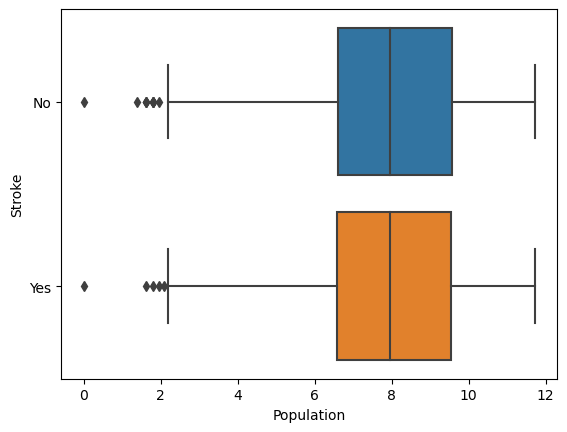

In [20]:
sns.boxplot(x=np.log(df.Population), y=df[target])

<Axes: xlabel='Income', ylabel='Stroke'>

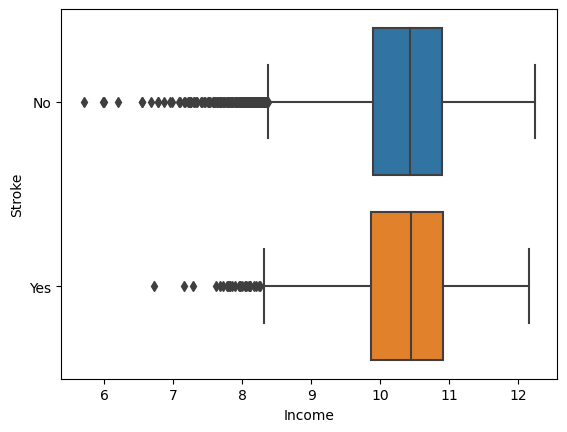

In [21]:
sns.boxplot(x=np.log(df.Income), y=df[target])

#### Categorical explanatory variables

In [22]:
for col in cat_cols:
    print(pd.crosstab(df[col],df[target]))
    print()

Stroke           No  Yes
Marital                 
Divorced       1482  382
Married        1533  369
Never Married  1510  372
Separated      1502  392
Widowed        1575  366

Stroke        No   Yes
Soft_drink            
No          5652  1390
Yes         1950   491

Stroke       No   Yes
HighBlood            
No         4513  1097
Yes        3089   784

Stroke               No  Yes
Complication_risk           
High               2544  634
Low                1622  392
Medium             3436  855

Stroke        No   Yes
Overweight            
No          2197   552
Yes         5405  1329

Stroke       No   Yes
Arthritis            
No         4848  1242
Yes        2754   639

Stroke      No   Yes
Diabetes            
No        5561  1354
Yes       2041   527

Stroke            No   Yes
Hyperlipidemia            
No              5008  1271
Yes             2594   610

Stroke      No   Yes
BackPain            
No        4472  1099
Yes       3130   782

Stroke     No   Yes
Anxiety        

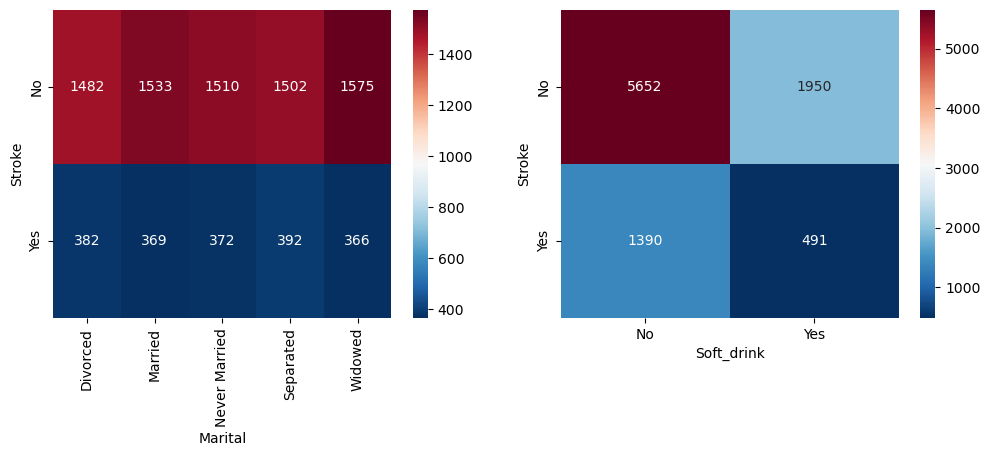

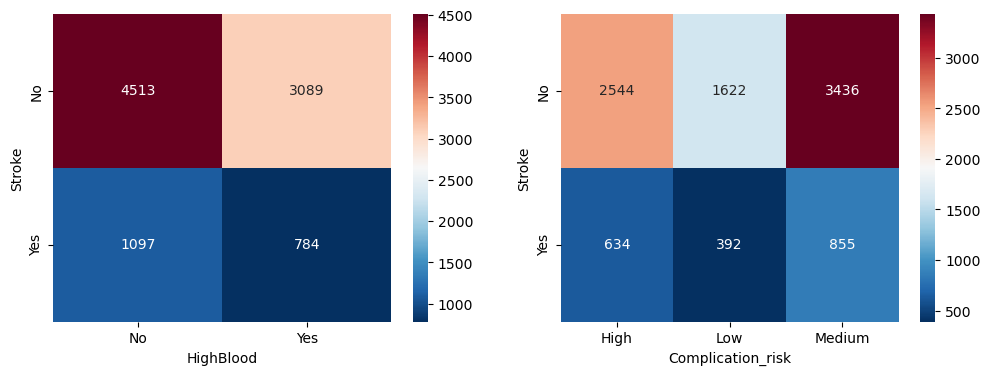

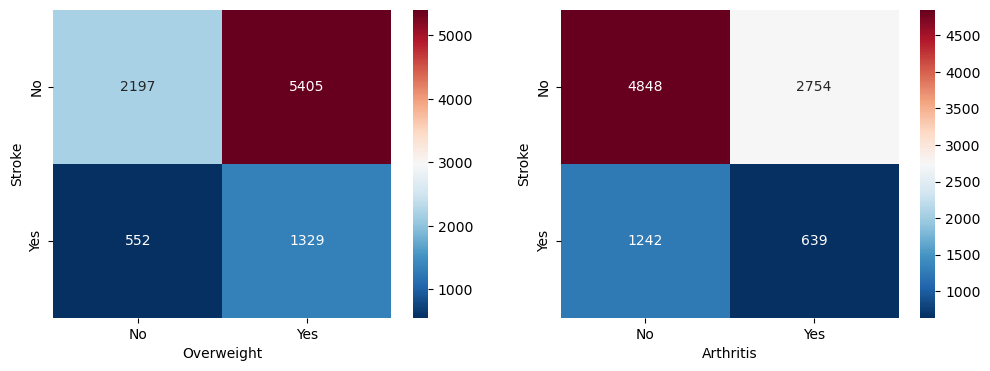

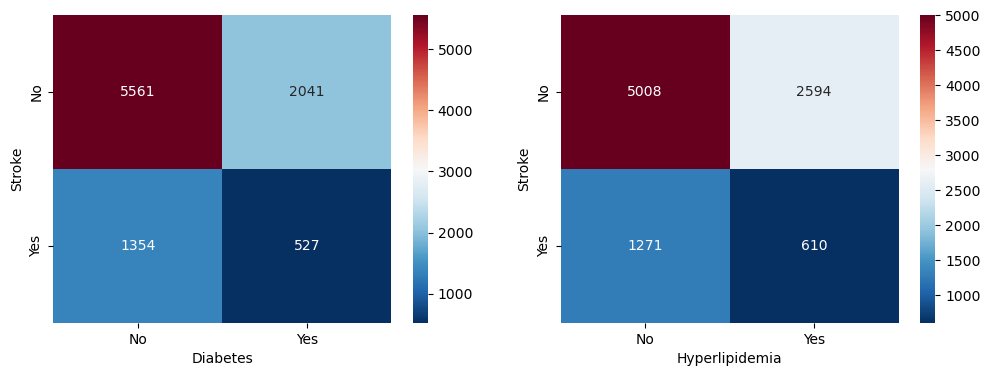

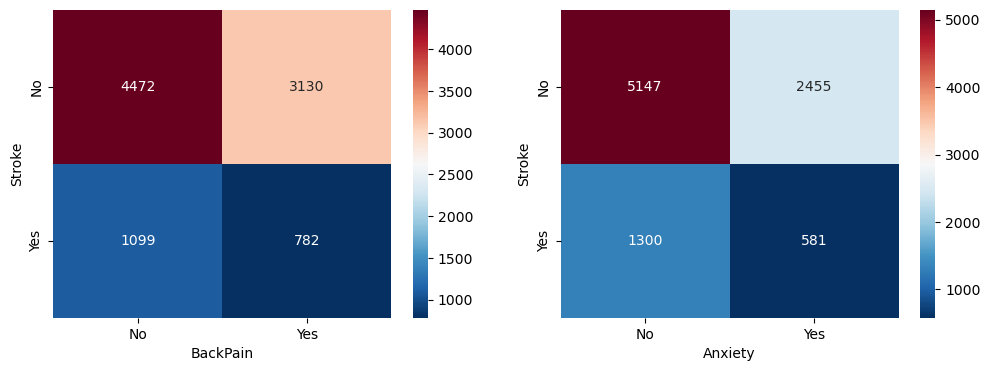

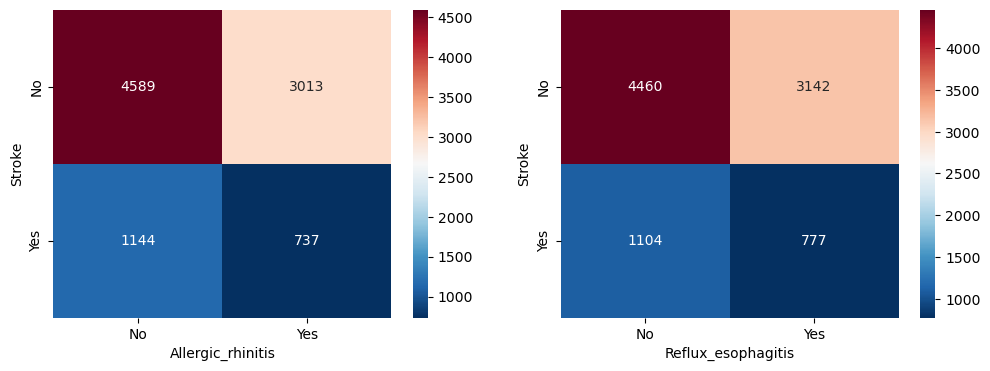

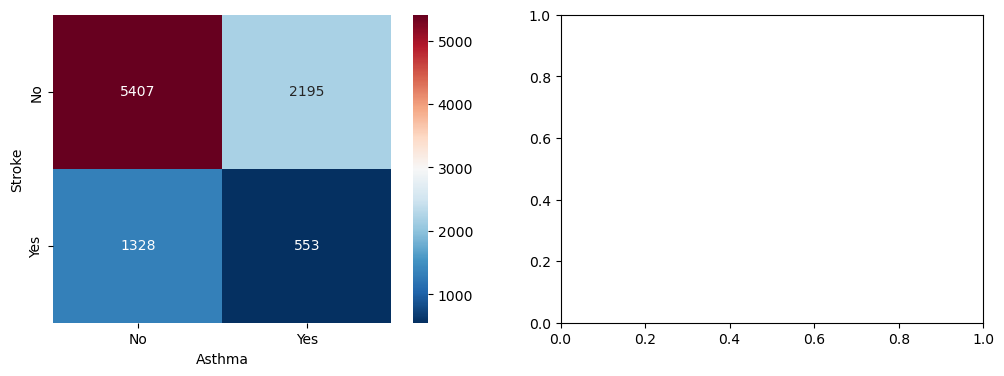

In [23]:
# Use heatmap rather than boxplots for showing categorical explanatory vs categorical target variable
# Code ref: Kumar, 2022
a=0
for col in cat_cols:
    if (a == 0) :    # Setup axes on every even iteration
        fig, axs = plt.subplots(1,2, figsize=(12,4))
    ct=pd.crosstab(df[target],df[col])
    sns.heatmap(ct, annot=True, fmt='.5g', cmap='RdBu_r', ax=axs[a])
    a = (a + 1) % 2   # alternate graphs on left/right of display
    #plt.title(col)
    if (a == 1) :   # Show plot on every odd iteration
        plt.show

## C4 - Data Wrangling
### Re-expressing Categorical Variables

In [24]:
# target variable dataframe
y = df[target].copy(deep=True)
# possible explanatory variables
X = df[quant_cols + cat_cols].copy(deep=True)

for col in cat_cols:
    print(df[col].unique())

['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
['No' 'Yes']
['Yes' 'No']
['Medium' 'High' 'Low']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


Set up dictionaries based on the above unique values in the data set. Code adapted from Larose & Larose (2019). `Marital` will be handled in the next code block.

In [25]:
dict_compl = {"Low": 1, "Medium": 2, "High": 3}
dict_yn = {"Yes": 1, "No": 0}
replace_dict = {'Soft_drink': dict_yn, 'HighBlood': dict_yn, 'Stroke': dict_yn, 'Complication_risk':dict_compl, 'Overweight': dict_yn,
                'Arthritis': dict_yn, 'Diabetes': dict_yn, 'Hyperlipidemia': dict_yn, 'BackPain': dict_yn, 'Anxiety': dict_yn, 
                'Allergic_rhinitis': dict_yn, 'Reflux_esophagitis': dict_yn, 'Asthma': dict_yn}
X.replace(replace_dict, inplace = True)
print(X.head())
y.replace(dict_yn, inplace = True)
y.head()

   Population  Children  Age    Income  VitD_levels   Marital  Soft_drink  \
0        2951         1   53  86575.93    19.141466  Divorced           0   
1       11303         3   51  46805.99    18.940352   Married           0   
2       17125         3   53  14370.14    18.057507   Widowed           0   
3        2162         0   78  39741.49    16.576858   Married           0   
4        5287         1   22   1209.56    17.439069   Widowed           1   

   HighBlood  Complication_risk  Overweight  Arthritis  Diabetes  \
0          1                  2           0          1         1   
1          1                  3           1          0         0   
2          1                  2           1          0         1   
3          0                  2           0          1         0   
4          0                  1           0          0         0   

   Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  \
0               0         1        1             

0    0
1    0
2    0
3    1
4    0
Name: Stroke, dtype: int64

Set up dummy one-hot variables for `Marital`. 
Per Dr. Middleton, using k-1 columns via the drop_first parameter in order to mitigate multicollinearity (2022). In this case, 'Divorced' is represented by 0's in all `Marital_*` columns.

In [26]:
X = pd.get_dummies(X, columns=['Marital'], drop_first=True)
cat_cols = ['Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
            'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Marital_Married', 
            'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed']  # replace column names in cat_cols list
X.head()

,Population,Children,Age,Income,VitD_levels,Soft_drink,HighBlood,Complication_risk,Overweight,Arthritis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,2951,1,53,86575.93,19.141466,0,1,2,0,1,...,0,1,1,1,0,1,0,0,0,0
1,11303,3,51,46805.99,18.940352,0,1,3,1,0,...,0,0,0,0,1,0,1,0,0,0
2,17125,3,53,14370.14,18.057507,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2162,0,78,39741.49,16.576858,0,0,2,0,1,...,0,0,0,0,1,1,1,0,0,0
4,5287,1,22,1209.56,17.439069,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


### Logarithmic Transformations
I showed above that taking the log of `Population` and `Income` provide more normally-distributed populations.  I will replace these columns in the model data with the log othe original values.

In [27]:
X['Population'] = np.log(X.Population)
X['Income'] = np.log(X.Income)
X.rename(columns={'Population': 'logPop', 'Income': 'logIncome'}, inplace=True)
quant_cols=['logPop', 'Children', 'Age', 'logIncome', 'VitD_levels']  # replace column names in quant_cols list
X.head()

,logPop,Children,Age,logIncome,VitD_levels,Soft_drink,HighBlood,Complication_risk,Overweight,Arthritis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,7.989899,1,53,11.368777,19.141466,0,1,2,0,1,...,0,1,1,1,0,1,0,0,0,0
1,9.332823,3,51,10.753766,18.940352,0,1,3,1,0,...,0,0,0,0,1,0,1,0,0,0
2,9.748295,3,53,9.572908,18.057507,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7.678789,0,78,10.590151,16.576858,0,0,2,0,1,...,0,0,0,0,1,1,1,0,0,0
4,8.573006,1,22,7.098012,17.439069,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


## C5 - Output cleaned / transformed data set


In [28]:
df_out = pd.concat([y, X], axis=1)

df_out.to_csv('clean_xform_medical_data.csv', index=False)
df_out.head()

,Stroke,logPop,Children,Age,logIncome,VitD_levels,Soft_drink,HighBlood,Complication_risk,Overweight,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,0,7.989899,1,53,11.368777,19.141466,0,1,2,0,...,0,1,1,1,0,1,0,0,0,0
1,0,9.332823,3,51,10.753766,18.940352,0,1,3,1,...,0,0,0,0,1,0,1,0,0,0
2,0,9.748295,3,53,9.572908,18.057507,0,1,2,1,...,0,0,0,0,0,0,0,0,0,1
3,1,7.678789,0,78,10.590151,16.576858,0,0,2,0,...,0,0,0,0,1,1,1,0,0,0
4,0,8.573006,1,22,7.098012,17.439069,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


## D1 - Initial Model


In [29]:
# Code reference: (Larose & Larose, 2019, p. 190)
import statsmodels.api as sm

# Add constant term to explanatory variables
X_c = sm.add_constant(X)
kitchensink_mod = sm.Logit(y, X_c)
ks_res = kitchensink_mod.fit()

ks_res.summary()


Optimization terminated successfully.
         Current function value: 0.497336
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Stroke   No. Observations:                 9483
Model:                          Logit   Df Residuals:                     9461
Method:                           MLE   Df Model:                           21
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                0.001561
Time:                        16:03:20   Log-Likelihood:                -4716.2
converged:                       True   LL-Null:                       -4723.6
Covariance Type:            nonrobust   LLR p-value:                    0.8355
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8640      0.447     -4.166      0.000      -2.741      -0.987
logPop                   -0.0014      0.014     -0.099      0.921      -0.028       0.026
Children                 -0.0008      0.015     -0.055      0.956      -0.031       0.029
Age                       0.0015      0.001      1.230      0.219      -0.001       0.004
logIncome                 0.0281      0.033      0.860      0.390      -0.036       0.092
VitD_levels               0.0093      0.013      0.722      0.470      -0.016       0.034
Soft_drink                0.0222      0.059      0.378      0.705      -0.093       0.138
HighBlood                 0.0426      0.052      0.814      0.416      -0.060       0.145
Complication_risk         0.0135      0.035      0.381      0.703      -0.056       0.083
Overweight               -0.0215      0.057     -0.380      0.704      -0.133       0.090
Arthritis                -0.0976      0.054     -1.797      0.072      -0.204       0.009
Diabetes                  0.0594      0.058      1.030      0.303      -0.054       0.172
Hyperlipidemia           -0.0769      0.055     -1.398      0.162      -0.185       0.031
BackPain                  0.0146      0.052      0.279      0.780      -0.088       0.117
Anxiety                  -0.0672      0.056     -1.207      0.227      -0.176       0.042
Allergic_rhinitis        -0.0200      0.053     -0.378      0.705      -0.124       0.084
Reflux_esophagitis        0.0007      0.052      0.013      0.989      -0.102       0.103
Asthma                    0.0234      0.057      0.413      0.680      -0.088       0.134
Marital_Married          -0.0645      0.082     -0.789      0.430      -0.225       0.096
Marital_Never Married    -0.0396      0.082     -0.485      0.627      -0.200       0.120
Marital_Separated         0.0164      0.081      0.204      0.839      -0.142       0.175
Marital_Widowed          -0.0981      0.082     -1.201      0.230      -0.258       0.062
=========================================================================================
"""

                  feature        VIF
0                  logPop  18.036401
1                Children   2.135163
2                     Age   7.546557
3               logIncome  72.636992
4             VitD_levels  58.736670
5              Soft_drink   1.348575
6               HighBlood   1.693418
7       Complication_risk   9.224035
8              Overweight   3.425999
9               Arthritis   1.558332
10               Diabetes   1.370782
11         Hyperlipidemia   1.509143
12               BackPain   1.707446
13                Anxiety   1.471719
14      Allergic_rhinitis   1.651454
15     Reflux_esophagitis   1.705024
16                 Asthma   1.409276
17        Marital_Married   2.007654
18  Marital_Never Married   1.997882
19      Marital_Separated   1.998684
20        Marital_Widowed   2.025270
                     logPop       Age  logIncome  VitD_levels  \
logPop             1.000000 -0.015294   0.005434     0.000300   
Age               -0.015294  1.000000  -0.013766     0.0

<Axes: >

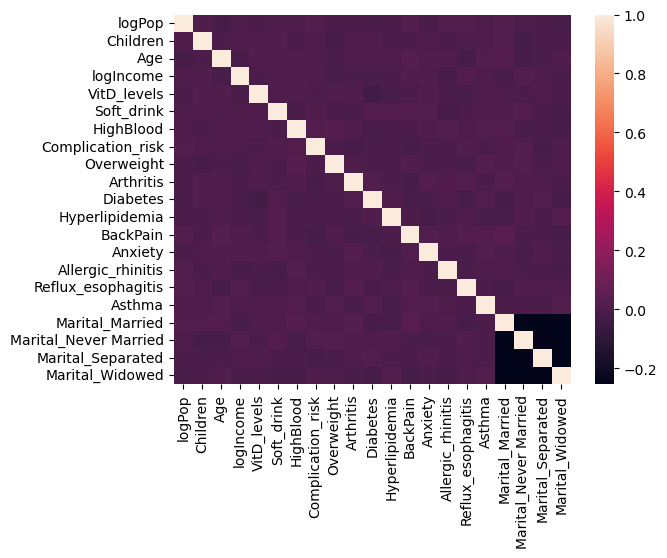

In [30]:

# Check for multicollinearity (Sewell, n.d.)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calc VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

print(X.loc[:, vif_data[vif_data.VIF > 5].feature].corr())
sns.heatmap(X.corr())

VIFs are high on full model, but no apparent high correlation between any pair of variables.

Proceed to reduce model

## D2 - Feature Selection

Eliminate features via backward stepwise elimination

In [31]:
# Get p-values from each feature
# .pvalues property produces a series with the feature names as the index (statsmodels.regression.linear_model.RegressionResults – statsmodels 0.15.0 documentation, n.d.)

# pv_sort = ks_res.pvalues.sort_values()
# # Get largest p-value & feature name from index
# highest_pval = pv_sort[-1]
# highest_pval_feature = pv_sort.index[-1]
# # print(np.round(pv_sort,3))

# # Make a working copy of our X dataframe
# X_work = X_c.copy(deep=True)

# # Iterate dropping feature with highest p-value, refit Logit with new feature set, check new p-values until all p-values < chosen alpha.
# # choose alpha as 0.07 rather than standard 0.05 to keep at least 3 explanatory variables in the reduced model.
# alpha = 0.07
# while highest_pval > alpha :
#     print("Dropping: ", highest_pval, highest_pval_feature)
#     X_work = X_work.drop(columns=highest_pval_feature)
#     reduce_mod = sm.Logit(y, X_work)
#     rm_res = reduce_mod.fit()
#     pv_sort = rm_res.pvalues.sort_values()
#     # Get largest remaining p-value & feature name
#     highest_pval = pv_sort[-1]
#     highest_pval_feature = pv_sort.index[-1]
    

    


Choose features using forward stepwise variable selection

In [32]:
# Code ref: Verbeist, n.d.
from sklearn.metrics import roc_auc_score

def auc(y, X):
    # Continue to use statsmodels Logit rather than sklearn LogisticRegression() in the ref code
    logreg = sm.Logit(y, X).fit(disp=False)
    predictions = logreg.predict(X)
    auc = roc_auc_score(y, predictions)
    return(auc)

def next_best(current_variables, candidate_variables, y, X_work):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(y, X_work[current_variables + [v]])
        if auc_v > best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable

cand_var = quant_cols + cat_cols
cur_var = ['const']
max_vars = 3   # max number of variables to include in final model
for i in range (0, max_vars):
    next_var = next_best(cur_var, cand_var, y, X_c)
    cur_var = cur_var + [next_var]
    cand_var.remove(next_var)
print(cur_var)


['const', 'Arthritis', 'Age', 'Marital_Separated']


## D3 - Reduced Logistic Regression model

In [33]:
X_red = X_c[cur_var].copy(deep=True)
print(X_red.head())
reduce_mod = sm.Logit(y, X_red)
rm_res = reduce_mod.fit(disp=False)
rm_res.summary()


   const  Arthritis  Age  Marital_Separated
0    1.0          1   53                  0
1    1.0          0   51                  0
2    1.0          0   53                  0
3    1.0          1   78                  0
4    1.0          0   22                  0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Stroke   No. Observations:                 9483
Model:                          Logit   Df Residuals:                     9479
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:               0.0006328
Time:                        16:03:21   Log-Likelihood:                -4720.6
converged:                       True   LL-Null:                       -4723.6
Covariance Type:            nonrobust   LLR p-value:                    0.1127
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4578      0.076    -19.300      0.000      -1.606      -1.310
Arthritis            -0.0995      0.054     -1.836      0.066      -0.206       0.007
Age                   0.0015      0.001      1.229      0.219      -0.001       0.004
Marital_Separated     0.0677      0.064      1.063      0.288      -0.057       0.193
=====================================================================================
"""

Check for multicollinearity on reduced feature set

             feature       VIF
0          Arthritis  1.458879
1                Age  1.634810
2  Marital_Separated  1.211249
                   Arthritis       Age  Marital_Separated
Arthritis           1.000000  0.004386           0.002933
Age                 0.004386  1.000000          -0.005466
Marital_Separated   0.002933 -0.005466           1.000000


<Axes: >

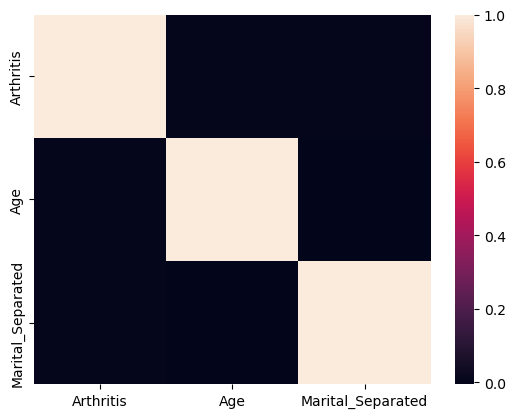

In [34]:
# Check for multicollinearity (Sewell, n.d.)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
X_red_without_const = X_red.drop(columns='const')
red_vif_data = pd.DataFrame()
red_vif_data['feature'] = X_red_without_const.columns

# Calc VIF for each feature
red_vif_data['VIF'] = [variance_inflation_factor(X_red_without_const.values, i) for i in range(len(X_red_without_const.columns))]

print(red_vif_data)

print(X_red_without_const.corr())
sns.heatmap(X_red_without_const.corr())

## E1 - Model comparison



#### LLR p-value

In [35]:
print("LLR p-value of original model: ", np.round(ks_res.llr_pvalue,3))
print("LLR p-value of reduced model: ", np.round(rm_res.llr_pvalue,3))

LLR p-value of original model:  0.835
LLR p-value of reduced model:  0.113


#### Pseudo R-squared

In [36]:
print("Pseudo R-squared of original model: ", np.round(ks_res.prsquared,3))
print("Pseudo R-squared of reduced model: ", np.round(rm_res.prsquared,3))

Pseudo R-squared of original model:  0.002
Pseudo R-squared of reduced model:  0.001


## E2 - Output


#### Confusion Matrix

In [40]:
# Code ref: (Chouinard, 2023.)
from sklearn.metrics import confusion_matrix

y_pred=rm_res.predict(X_red).round()
cm=confusion_matrix(y, y_pred)

y_ks_pred=ks_res.predict(X_c).round()
cm_ks=confusion_matrix(y, y_ks_pred)

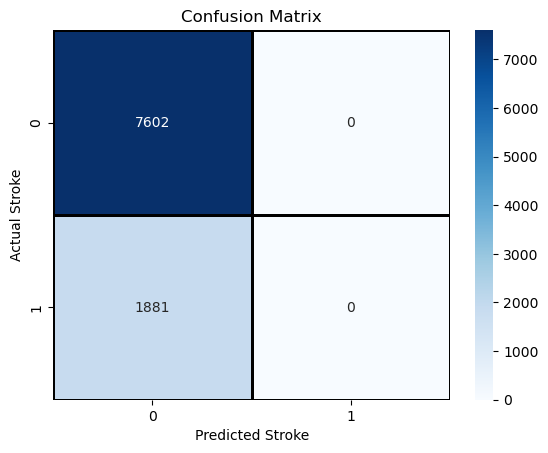

In [41]:
ax = sns.heatmap(cm,cmap='Blues', annot=True, fmt='.5g', linecolor='black', linewidths=2)
ax.set(xlabel='Predicted Stroke', ylabel='Actual Stroke')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy calculation

In [42]:
# Code ref: (Ragan, 2018).

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.8016450490351155
